In [146]:
import numpy as np
import matplotlib.pyplot as plt

In [147]:
def f(x):
    return np.exp(-np.sin(x**2)/2) + x

In [148]:
# 25 points between -10 and 10
x_all = np.linspace(-10, 10, 25)
y_all = f(x_all)

In [149]:
# shuffle and split
idx = np.random.permutation(len(x_all))
train_idx = idx[:20]
test_idx = idx[20:]
x_train, y_train = x_all[train_idx], y_all[train_idx]
x_test, y_test = x_all[test_idx], y_all[test_idx]

In [150]:
# Initialize parameters
rng = np.random.randn
w1, b1 = rng()*0.1, 0
w2, b2 = rng()*0.1, 0
w3, b3 = rng()*0.1, 0

In [151]:
def tanh(z):
    return np.tanh(z)

def tanh_deriv(z):
    return 1 - np.tanh(z)**2

In [152]:
# Training hyperparameters
lr = 0.001
epochs = 5000

In [153]:
# Training loop
for epoch in range(epochs):
    # Forward propagation
    z1 = w1*x_train + b1
    a1 = tanh(z1)

    z2 = w2*a1 + b2
    a2 = tanh(z2)

    z3 = w3*a2 + b3
    y_hat = tanh(z3)

    # Loss (MSE)
    loss = np.mean((y_hat - y_train)**2)

    # Backward propagation
    dL_dyhat = 2*(y_hat - y_train)/len(y_train)

    # Gradient for layer 3
    dL_dz3 = dL_dyhat * tanh_deriv(z3)
    dw3 = np.sum(dL_dz3 * a2)
    db3 = np.sum(dL_dz3)

    # Gradient for layer 2
    dL_da2 = dL_dz3 * w3
    dL_dz2 = dL_da2 * tanh_deriv(z2)
    dw2 = np.sum(dL_dz2 * a1)
    db2 = np.sum(dL_dz2)

    # Gradient for layer 1
    dL_da1 = dL_dz2 * w2
    dL_dz1 = dL_da1 * tanh_deriv(z1)
    dw1 = np.sum(dL_dz1 * x_train)
    db1 = np.sum(dL_dz1)

    # Update weights and biases
    w1 -= lr*dw1
    b1 -= lr*db1
    w2 -= lr*dw2
    b2 -= lr*db2
    w3 -= lr*dw3
    b3 -= lr*db3

In [154]:
# Evaluation function
def predict(x):
    z1 = w1*x + b1
    a1 = tanh(z1)
    z2 = w2*a1 + b2
    a2 = tanh(z2)
    z3 = w3*a2 + b3
    y_hat = tanh(z3)
    return y_hat

In [155]:
# Make predictions
train_pred = predict(x_train)
test_pred = predict(x_test)

In [156]:
# Calculate MSE
train_mse = np.mean((train_pred - y_train)**2)
test_mse = np.mean((test_pred - y_test)**2)

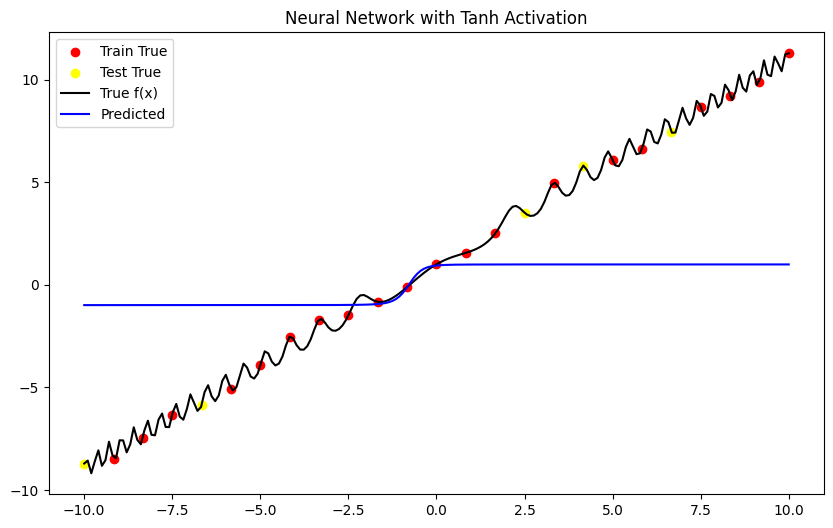

In [157]:
# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label="Train True", color="red")
plt.scatter(x_test, y_test, label="Test True", color="yellow")
x_line = np.linspace(-10, 10, 200)
plt.plot(x_line, f(x_line), label="True f(x)", color="black")
plt.plot(x_line, predict(x_line), label="Predicted", color="blue")
plt.legend()
plt.title("Neural Network with Tanh Activation")
plt.show()

In [158]:
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

Training MSE: 27.06478141882979
Test MSE: 30.982644782197145
